In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(dplyr)

In [3]:
library(viridis)

Loading required package: viridisLite



In [4]:
library(ggplot2)

In [5]:
library(stringr)

In [6]:
data_renova <- read.csv("no_anp_renova_cusco.csv")

In [7]:
head(data_renova)

,OBJECTID,FID_V_17,REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,6873,0,CUSCO,LA CONVENCION,INKAWASI,LUCMA - NEAREST 2KM,-13.39573,-73.21041
2,6874,0,CUSCO,LA CONVENCION,INKAWASI,LUCMA - NEAREST 2KM,-13.39569,-73.21041
3,6875,0,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38080,-72.03791
4,6876,0,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38079,-72.03796
5,6877,0,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38003,-72.03660
6,6878,0,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.37986,-72.03657


In [8]:
data_solaris <- read.csv("no_anp_solaris_cusco.csv")

In [9]:
head(data_solaris)

,OBJECTID,VERTICE,REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,28584,3576,CUSCO,LA CONVENCION,VILLA VIRGEN,HUALLGUAPAMPA,-13.04583,-73.47359
2,28603,3595,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45685,-72.61364
3,28604,3596,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45729,-72.61411
4,28605,3597,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45562,-72.61934
5,28606,3598,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45566,-72.61950
6,28607,3599,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45634,-72.61409


In [10]:
data_1 <- data_solaris %>%
    filter(REGION == "CUSCO") %>%
  select(REGION, PROVINCIA, DISTRITO, LOCALIDAD, LATITUD, LONGITUD) %>% 
  mutate(EMPRESA = "RENOVA")

In [11]:
head(data_1)

,REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD,EMPRESA
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CUSCO,LA CONVENCION,VILLA VIRGEN,HUALLGUAPAMPA,-13.04583,-73.47359,RENOVA
2,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45685,-72.61364,RENOVA
3,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45729,-72.61411,RENOVA
4,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45562,-72.61934,RENOVA
5,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45566,-72.61950,RENOVA
6,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45634,-72.61409,RENOVA


In [12]:
data_2 <- data_renova %>%
  filter(REGION == "CUSCO") %>%
  select(REGION, PROVINCIA, DISTRITO, LOCALIDAD, LATITUD, LONGITUD) %>%
  mutate(EMPRESA = "ORIENTAL")

In [13]:
head(data_2)

,REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD,EMPRESA
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CUSCO,LA CONVENCION,INKAWASI,LUCMA - NEAREST 2KM,-13.39573,-73.21041,ORIENTAL
2,CUSCO,LA CONVENCION,INKAWASI,LUCMA - NEAREST 2KM,-13.39569,-73.21041,ORIENTAL
3,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38080,-72.03791,ORIENTAL
4,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38079,-72.03796,ORIENTAL
5,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.38003,-72.03660,ORIENTAL
6,CUSCO,URUBAMBA,HUAYLLABAMBA,CHINCHERO - NEAREST 2KM,-13.37986,-72.03657,ORIENTAL


In [14]:
data_consolidada <- rbind(data_1,data_2)

In [15]:
head(data_consolidada)

,REGION,PROVINCIA,DISTRITO,LOCALIDAD,LATITUD,LONGITUD,EMPRESA
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CUSCO,LA CONVENCION,VILLA VIRGEN,HUALLGUAPAMPA,-13.04583,-73.47359,RENOVA
2,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45685,-72.61364,RENOVA
3,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45729,-72.61411,RENOVA
4,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45562,-72.61934,RENOVA
5,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45566,-72.61950,RENOVA
6,CUSCO,ANTA,MOLLEPATA,MALLAO,-13.45634,-72.61409,RENOVA


In [16]:
data_consolidada <- data_consolidada %>%
    mutate(PROVINCIA = str_trim(PROVINCIA, side="both"))

In [17]:
users_by_localidad <- data_consolidada %>%
    dplyr::group_by(PROVINCIA, DISTRITO, LOCALIDAD) %>%
    dplyr::summarise(
        q_users = n()
    )

`summarise()` has grouped output by 'PROVINCIA', 'DISTRITO'. You can override
using the `.groups` argument.


In [18]:
users_by_distrito <- users_by_localidad %>%
  group_by(PROVINCIA, DISTRITO) %>%
  summarise(
    q_users = sum(q_users)
  )

`summarise()` has grouped output by 'PROVINCIA'. You can override using the
`.groups` argument.


In [19]:
users_by_provincia <- users_by_distrito %>%
  group_by(PROVINCIA) %>%
  summarise(
    q_users = sum(q_users)
  )

In [20]:
users_by_provincia

PROVINCIA,q_users
<chr>,<int>
ACOMAYO,1732
ANTA,986
CALCA,2107
CANAS,6897
CANCHIS,3732
CHUMBIVILCAS,13419
CUSCO,165
ESPINAR,17266
LA CONVENCION,16217


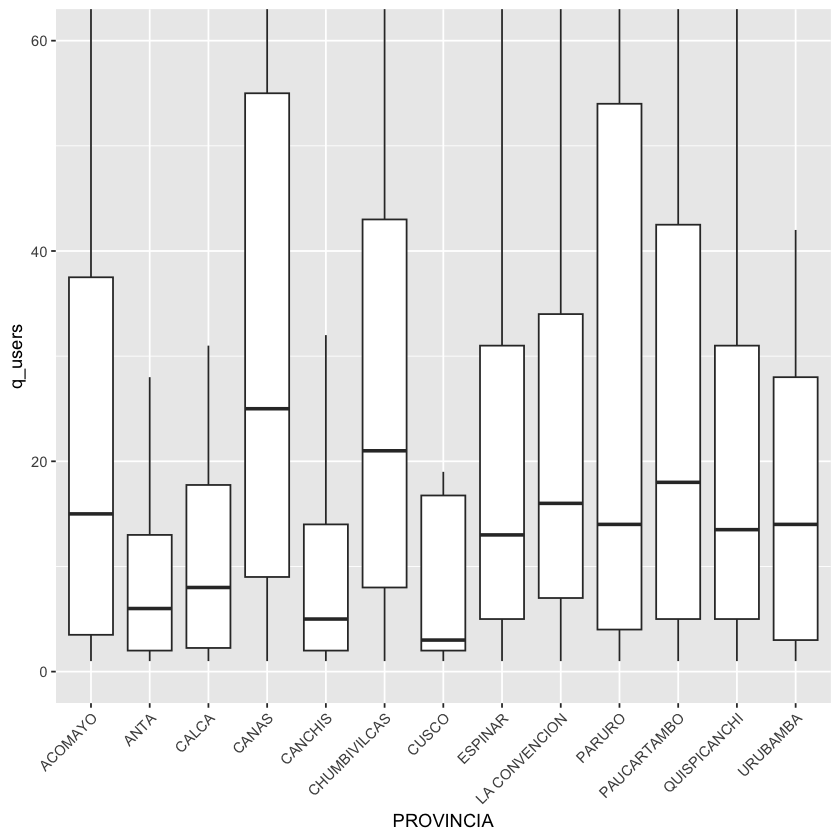

In [21]:
users_by_localidad %>%
  ggplot(aes(x=PROVINCIA, y=q_users)) +
  geom_boxplot(outlier.shape = NA) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_cartesian(ylim =  c(0, 60))

In [22]:
mtemp <- table(users_by_localidad$PROVINCIA)

In [23]:
mtemp


      ACOMAYO          ANTA         CALCA         CANAS       CANCHIS 
           51            65            66           141           183 
 CHUMBIVILCAS         CUSCO       ESPINAR LA CONVENCION        PARURO 
          281            12           525           236            69 
  PAUCARTAMBO  QUISPICANCHI      URUBAMBA 
          143           230            21 

In [24]:
mtemp <- 1:length(table(users_by_localidad$PROVINCIA))

In [25]:
mtemp

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13

In [26]:
mtemp <- aggregate(q_users ~ PROVINCIA, users_by_localidad, median)[,2]

In [27]:
mtemp

[1] 15.0  6.0  8.0 25.0  5.0 21.0  3.0 13.0 16.0 14.0 18.0 13.5 14.0

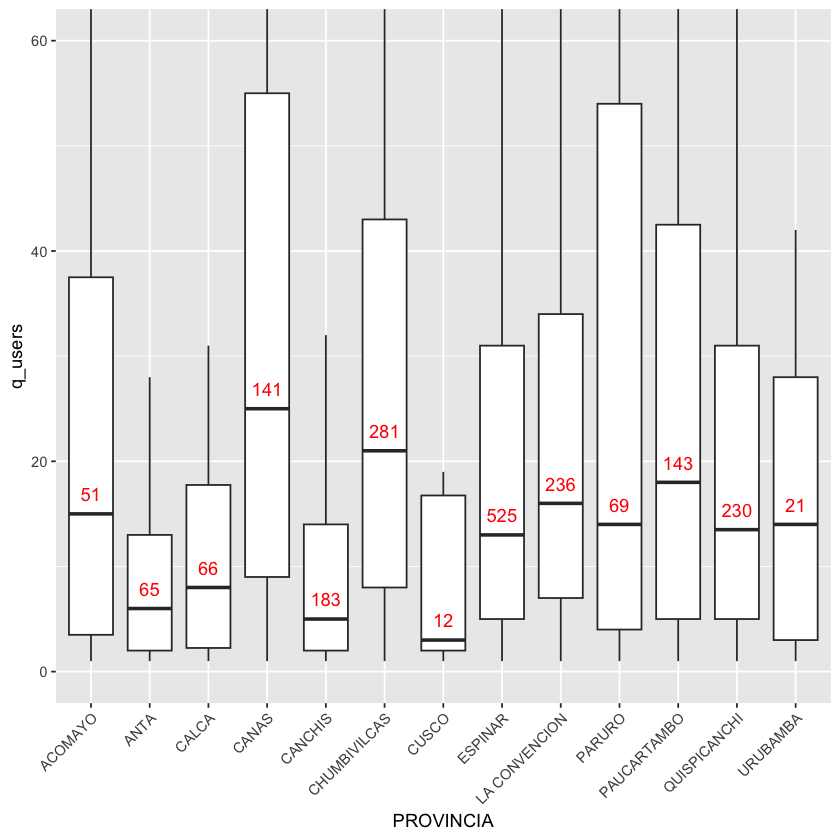

In [28]:
users_by_localidad %>%
  ggplot(aes(x=PROVINCIA, y=q_users)) +
  geom_boxplot(outlier.shape = NA) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_cartesian(ylim =  c(0, 60)) +
  annotate("text",
           x = 1:length(table(users_by_localidad$PROVINCIA)),
           y = aggregate(q_users ~ PROVINCIA, users_by_localidad, median)[,2],
           #y = 55,
           label = table(users_by_localidad$PROVINCIA),
           col = "red",
           vjust = -1)

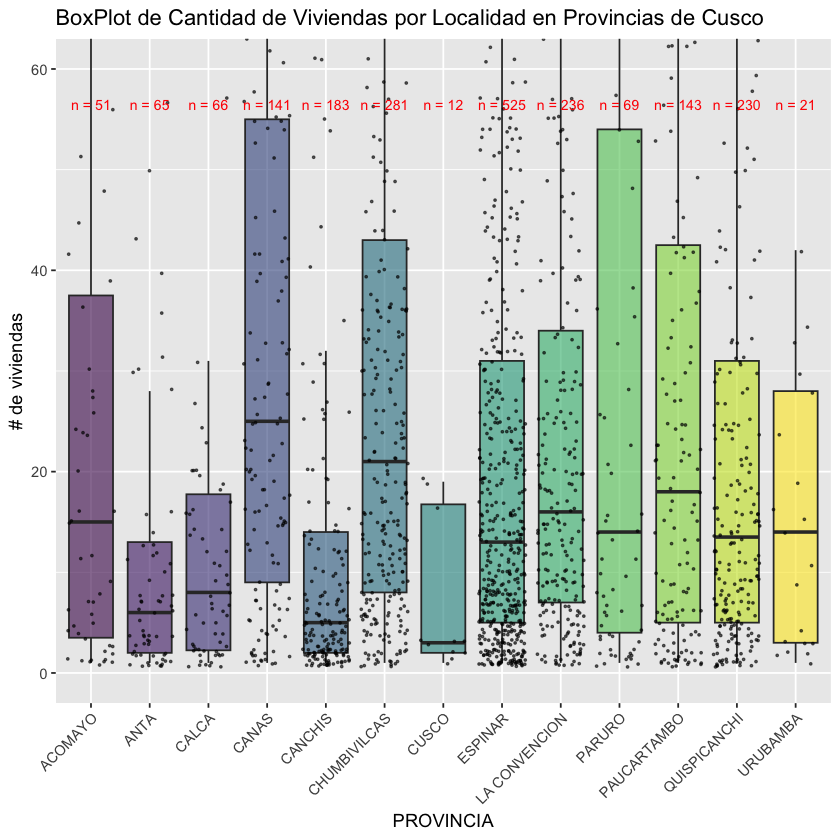

In [29]:
users_by_localidad %>%
  ggplot( aes(x=PROVINCIA, y=q_users, fill=PROVINCIA)) +
  geom_boxplot(outlier.shape = NA) +
  scale_fill_viridis(discrete = TRUE, alpha=0.6) +
  geom_jitter(color="black", size=0.4, alpha=0.6) +
  #theme_ipsum() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    legend.position="none"
#    plot.title = element_text(size=11)
  ) +
  coord_cartesian(ylim =  c(0, 60)) +
  annotate("text",
           x = 1:length(table(users_by_localidad$PROVINCIA)),
#           y = aggregate(q_users ~ PROVINCIA, users_by_localidad, median)[,2],
           y = 55,
           label = paste("n =",table(users_by_localidad$PROVINCIA)),
           col = "red",
           size = 3,
           vjust = -1) +
  ggtitle("BoxPlot de Cantidad de Viviendas por Localidad en Provincias de Cusco") +
  xlab("PROVINCIA") +
  ylab("# de viviendas")

In [30]:
ToothGrowth %>%
  group_by(supp) %>%
  arrange(len)

len,supp,dose
<dbl>,<fct>,<dbl>
4.2,VC,0.5
5.2,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
7.0,VC,0.5
7.3,VC,0.5
8.2,OJ,0.5
9.4,OJ,0.5
9.7,OJ,0.5


In [31]:
ToothGrowth %>%
  group_by(supp) %>%
  arrange(len, .by_group = TRUE)

len,supp,dose
<dbl>,<fct>,<dbl>
8.2,OJ,0.5
9.4,OJ,0.5
9.7,OJ,0.5
9.7,OJ,0.5
10.0,OJ,0.5
14.5,OJ,0.5
14.5,OJ,1.0
15.2,OJ,0.5
16.5,OJ,0.5


In [34]:
library(envDocument)

In [35]:
env_doc()

Warning message in getScriptInfo():
“Error in getScriptPath() : No path information available.
”
Warning message:
“Package git2r is needed by getGitInfo. Please install it or call env_doc(git = FALSE).”


Name,Value,Section
<chr>,<chr>,<chr>
sysname,Darwin,System
release,23.4.0,System
version,Darwin Kernel Version 23.4.0: Fri Mar 15 00:11:08 PDT 2024; root:xnu-10063.101.17~1/RELEASE_ARM64_T8122,System
nodename,iMac.local,System
machine,arm64,System
login,root,System
user,davidorosco1,System
effective_user,davidorosco1,System
Directory,/Users/davidorosco1/RenovaSolaris/Procesa_Cusco/Procesa-Cusco,System


In [37]:
getPackageInfo()

Name,Value
<chr>,<chr>
envDocument,2.4.1 CRAN CRAN 2019-08-08
viridis,0.6.5 CRAN CRAN 2024-01-28
viridisLite,0.4.2 CRAN CRAN 2023-05-02
lubridate,1.9.3 CRAN CRAN 2023-09-27 09:20:06 UTC
forcats,1.0.0 CRAN CRAN 2023-01-29 22:20:02 UTC
stringr,1.5.1 CRAN CRAN 2023-11-14 23:10:02 UTC
dplyr,1.1.4 CRAN CRAN 2023-11-17 16:50:02 UTC
purrr,1.0.2 CRAN CRAN 2023-08-10 08:20:07 UTC
readr,2.1.5 CRAN CRAN 2024-01-10 23:20:02 UTC
